In [35]:
%matplotlib inline

In [46]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pytpc

from pytpc.hdfdata import HDFDataFile
import yaml
import h5py

In [47]:
DETECTOR_LENGTH = 1250.0
DETECTOR_RADIUS = 275.0

# Testing Pure Noise Event Sim

In [48]:
empty_evt = np.empty([1,4])

In [49]:
num_noisepts = np.random.randint(20, 300,)

#generate x and y based on random pad numbers
paddresses = np.random.randint(0,10240, (num_noisepts, 1))
pads = pytpc.generate_pad_plane()
pcenters = pads.mean(1)
xys = pcenters[paddresses].reshape(num_noisepts, 2)

In [50]:
print(num_noisepts)

246


In [51]:
#z and charge values are generated randomly in realistic ranges
zs = np.random.uniform(0, DETECTOR_LENGTH, (num_noisepts, 1))
charges = np.random.uniform(1, 4000, (num_noisepts, 1))

In [52]:
noise_mat = np.hstack((xys, zs, charges))

In [53]:
noise_evt = np.vstack((empty_evt, noise_mat))

(0.0, 2000.0)

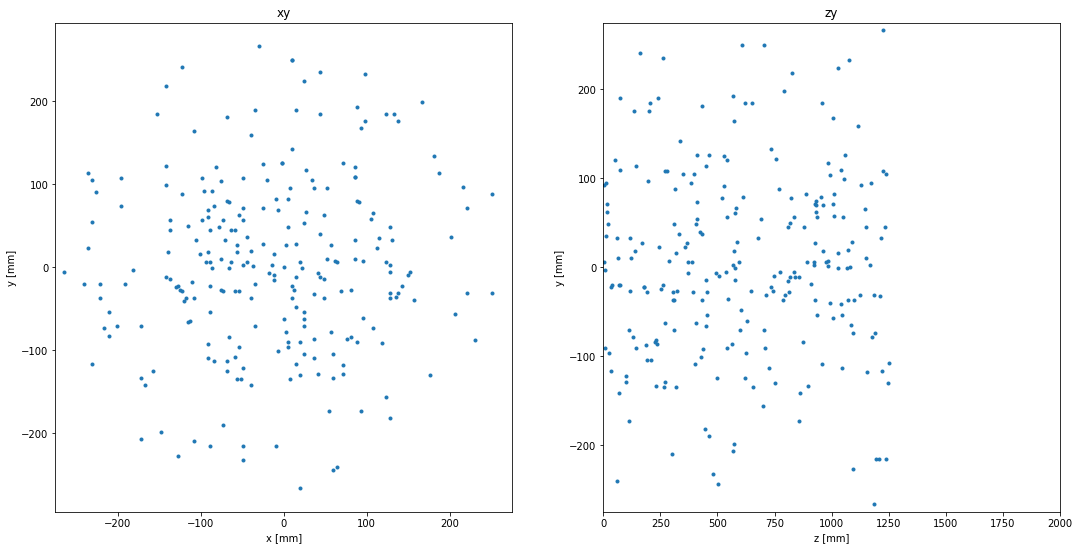

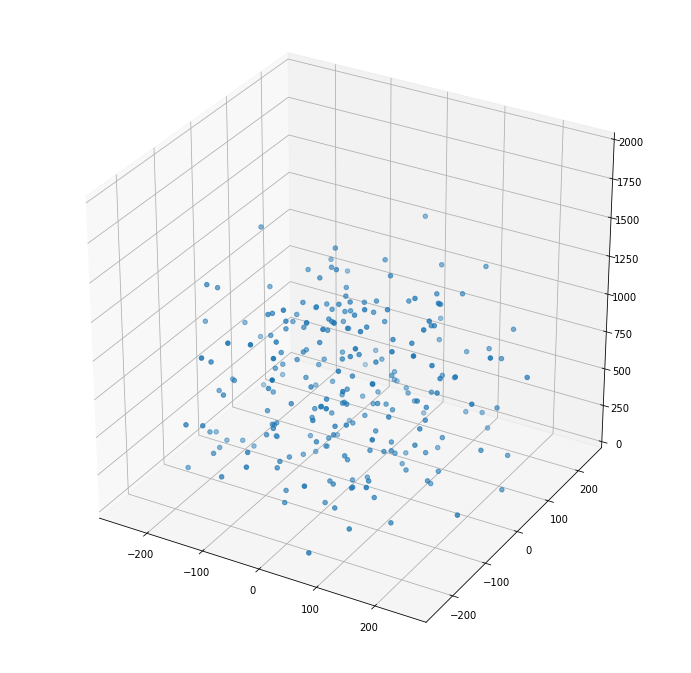

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(18, 9))

ax[0].plot(noise_evt[:,0], noise_evt[:,1], '.')
ax[0].axis('equal')
        
ax[0].set_xlabel('x [mm]')
ax[0].set_ylabel('y [mm]')
ax[0].set_title('xy')
ax[0].set_xlim((-275, 275))
ax[0].set_ylim((-275, 275))

#######################################################################################################################
ax[1].plot(noise_evt[:,2], noise_evt[:,1], '.')
#ax[1].axis('equal')
        
ax[1].set_xlabel('z [mm]')
ax[1].set_ylabel('y [mm]')
ax[1].set_title('zy')
ax[1].set_xlim((0, 2000))
ax[1].set_ylim((-275, 275))

#######################################################################################################################
#plt.ylim((-275, 275))
fig2 = plt.figure(figsize=(12,12))
ax2 = fig2.add_subplot(111, projection="3d")
ax2 = fig2.add_subplot(111, projection="3d")
ax2.scatter(noise_evt[:,0], noise_evt[:,1], noise_evt[:,2])
ax2.axis('equal')
ax2.set_xlim(-275., 275.)
ax2.set_ylim(-275., 275.)
ax2.set_zlim(0., 2000.)

In [55]:
#  Checking discretized .npz file

In [56]:
noise_data = sp.sparse.load_npz('../data/NO-tilt/20x20x20/noiseDisc_40000_20x20x20.npz')

In [67]:
print(noise_data[0].shape)

(1, 8000)


In [62]:
p_data = sp.sparse.load_npz('../data/NO-tilt/20x20x20/pDisc_40000_20x20x20.npz')

In [66]:
print(p_data[0].shape)

(1, 8000)
